<a href="https://colab.research.google.com/github/AhmedCode99/23-Homework6G2/blob/main/task1_trapezoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the upcoming cell we have trapezoid(), cumulative_integral_trapezoid(), f(), g(), and h()

## $f(x) = exp(-1/x)$
## $g(x) = cos(1/x)$
## $h(x) = x^3 + 1/2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoid(f, a, b, n):
    """Approximates the definite integral of f from a to b by
    the composite trapezoidal rule, using n subintervals.
    From http://en.wikipedia.org/wiki/Trapezoidal_rule
    """
    h = (b - a) / n
    s = f(a) + f(b)
    i = np.arange(0,n)
    s += 2 * np.sum( f(a + i[1:] * h) )
    return s * h / 2


def cumulative_integral_trapezoid(f,a,b,dx):
    """Function that calculates the antidervative function of f"""

    x_values = np.arange(a,b,dx)

    num_of_steps = np.floor((b-a)/dx)

    antiderivative = np.empty(len(x_values)+1)

    antiderivative[0] = trapezoid(f, a, a+dx, 4)

    j = 1

    while j <= num_of_steps :

      antiderivative[j] = antiderivative[j-1] + trapezoid(f, a+((j-1)*dx), a+(j*dx), 4)

      j = j + 1

    return antiderivative[:-1], x_values

def f(x):
    # Replace zero values in x with a small positive value to avoid division by zero
    x_safe = np.where(x == 0, np.finfo(float).eps, x)

    return np.exp(-1 / x_safe)

def g(x):
    # Replace zero values in x with a small positive value to avoid division by zero
    x_safe = np.where(x == 0, np.finfo(float).eps, x)

    return np.cos(1 / x_safe)

def h(x):
  return (x*x*x)+(1/2)

# In the upcoming cell trapezoid() is used to estimate the integrals of the three functions over the require limits.

In [2]:
function_list = np.array([f,g,h])
function_list_str = ["exp(-1/x)","cos(1/x)","(x^3)+(1/2)"]
lower_limit = np.array([0.0, 0.0, -1.0])
upper_limit = np.array([20.0, 2.0*np.pi, 1.0])
dx = 0.01
n=100
divergence_limit = 50000 # A number above which the integral is divergent

In [3]:
for j in range(len(lower_limit)):
  for i in range(len(lower_limit)):
    integration = trapezoid(function_list[j], lower_limit[i], upper_limit[i], n)

    if integration < divergence_limit:
      print("The trapezoid itegration of {} from {} to {}, is {}".format(function_list_str[j],
        lower_limit[i], np.round(upper_limit[i],2), np.round(integration,2)))
    else: print("The trapezoid itegration of {} from {} to {}, is divergent".format(function_list_str[j],
        lower_limit[i], np.round(upper_limit[i],2)))

The trapezoid itegration of exp(-1/x) from 0.0 to 20.0, is 16.56
The trapezoid itegration of exp(-1/x) from 0.0 to 6.28, is 3.95
The trapezoid itegration of exp(-1/x) from -1.0 to 1.0, is divergent
The trapezoid itegration of cos(1/x) from 0.0 to 20.0, is 18.48
The trapezoid itegration of cos(1/x) from 0.0 to 6.28, is 4.7
The trapezoid itegration of cos(1/x) from -1.0 to 1.0, is -0.1
The trapezoid itegration of (x^3)+(1/2) from 0.0 to 20.0, is 40014.0
The trapezoid itegration of (x^3)+(1/2) from 0.0 to 6.28, is 392.82
The trapezoid itegration of (x^3)+(1/2) from -1.0 to 1.0, is 1.0


# Plots of $f(x) = exp(-1/x)$


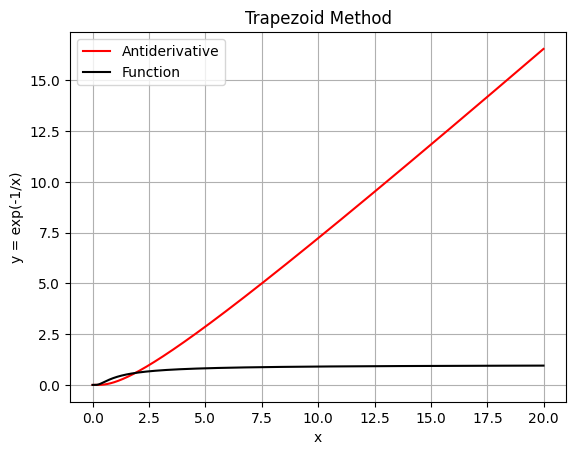

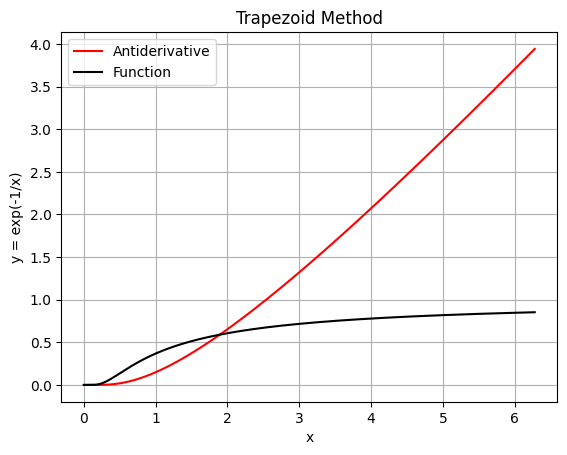

In [4]:
for i in range(len(lower_limit)-1):

  integral, x = cumulative_integral_trapezoid(f,lower_limit[i],upper_limit[i],dx)
  yvals = f(x)

  plt.plot(x, integral, c='Red', label = "Antiderivative")
  plt.plot(x, yvals,c='Black', label = "Function")
  plt.xlabel("x")
  plt.ylabel("y = exp(-1/x)")
  #plt.ylim(-1, 20)
  #plt.axis('tight')
  #plt.autoscale(axis='y')
  plt.grid(True)
  plt.title("Trapezoid Method")
  plt.legend()
  plt.show()

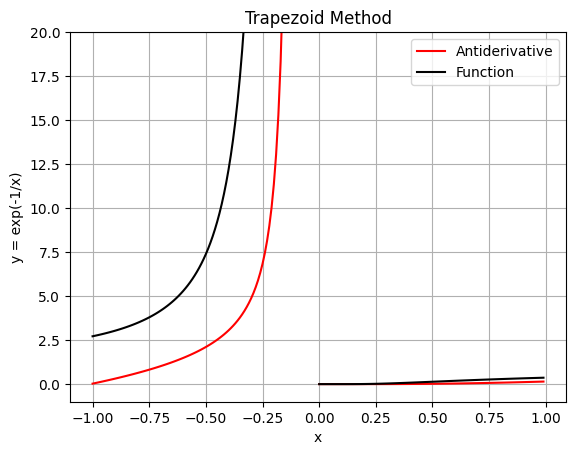

In [5]:
integral1, x1 = cumulative_integral_trapezoid(f,-1.0,0.0,0.01)

integral2, x2 = cumulative_integral_trapezoid(f,0.0,1.0,0.01)

yvals1 = f(x1)

yvals2 = f(x2)

plt.plot(x1, integral1, c='Red', label = "Antiderivative")
plt.plot(x1, yvals1,c='Black', label = "Function")
plt.plot(x2, integral2, c='Red')
plt.plot(x2, yvals2,c='Black')
plt.xlabel("x")
plt.ylabel("y = exp(-1/x)")
plt.ylim(-1, 20)
#plt.axis('tight')
#plt.autoscale(axis='y')
plt.grid(True)
plt.title("Trapezoid Method")
plt.legend()
plt.show()

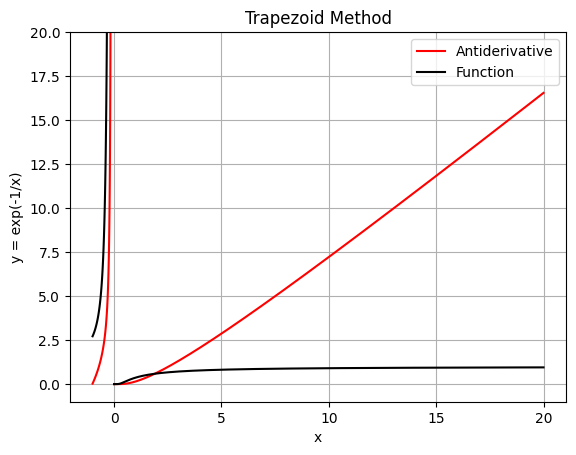

In [8]:
integral1, x1 = cumulative_integral_trapezoid(f,-1.0,0.0,0.01)

integral2, x2 = cumulative_integral_trapezoid(f,0.0,20.0,0.01)

yvals1 = f(x1)

yvals2 = f(x2)

plt.plot(x1, integral1, c='Red', label = "Antiderivative")
plt.plot(x1, yvals1,c='Black', label = "Function")
plt.plot(x2, integral2, c='Red')
plt.plot(x2, yvals2,c='Black')
plt.xlabel("x")
plt.ylabel("y = exp(-1/x)")
plt.ylim(-1, 20)
#plt.axis('tight')
#plt.autoscale(axis='y')
plt.grid(True)
plt.title("Trapezoid Method")
plt.legend()
plt.show()

# Plots of $g(x) = cos(1/x)$


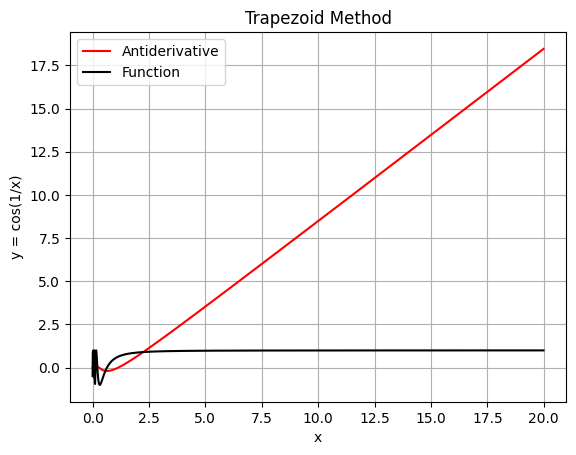

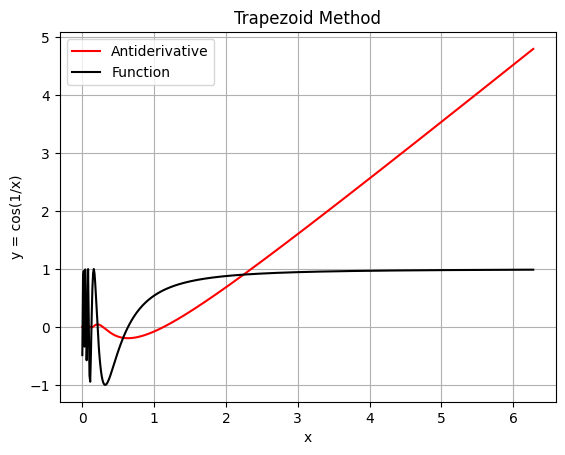

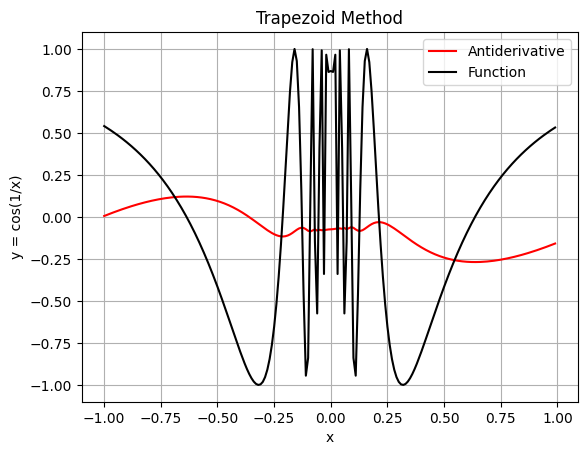

In [9]:
for i in range(len(lower_limit)):

  integral, x = cumulative_integral_trapezoid(g,lower_limit[i],upper_limit[i],dx)
  yvals = g(x)

  plt.plot(x, integral, c='Red', label = "Antiderivative")
  plt.plot(x, yvals,c='Black', label = "Function")
  plt.xlabel("x")
  plt.ylabel("y = cos(1/x)")
  #plt.ylim(-1, 20)
  #plt.axis('tight')
  #plt.autoscale(axis='y')
  plt.grid(True)
  plt.title("Trapezoid Method")
  plt.legend()
  plt.show()

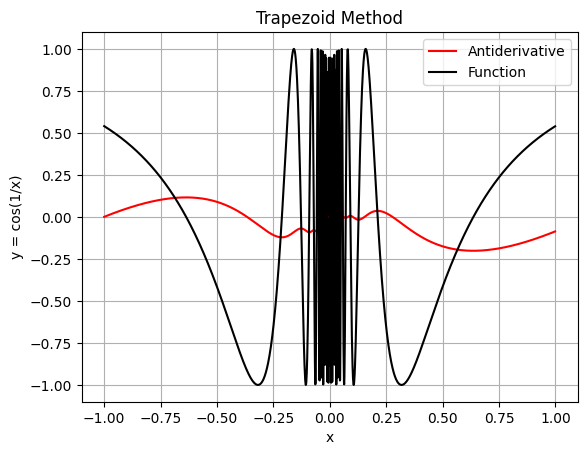

In [10]:
integral1, x1 = cumulative_integral_trapezoid(g,-1.0,0.0,0.001)

integral2, x2 = cumulative_integral_trapezoid(g,0.0,1,0.001)

yvals1 = g(x1)

yvals2 = g(x2)

plt.plot(x1, integral1, c='Red', label = "Antiderivative")
plt.plot(x1, yvals1,c='Black', label = "Function")
plt.plot(x2, integral2, c='Red')
plt.plot(x2, yvals2,c='Black')
plt.xlabel("x")
plt.ylabel("y = cos(1/x)")
#plt.ylim(-1, 20)
#plt.axis('tight')
#plt.autoscale(axis='y')
plt.grid(True)
plt.title("Trapezoid Method")
plt.legend()
plt.show()

# Plots of $h(x) = x^3 + 1/2$


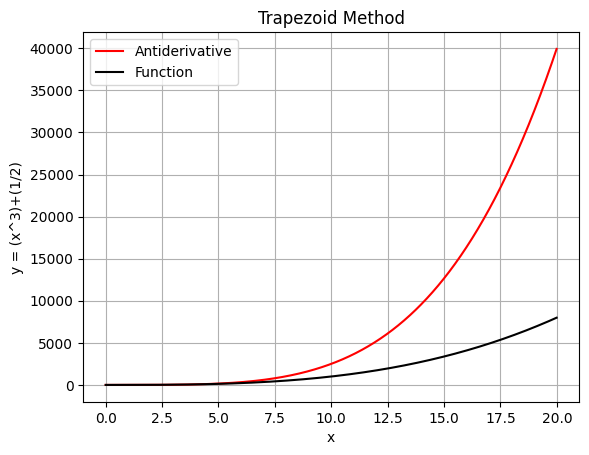

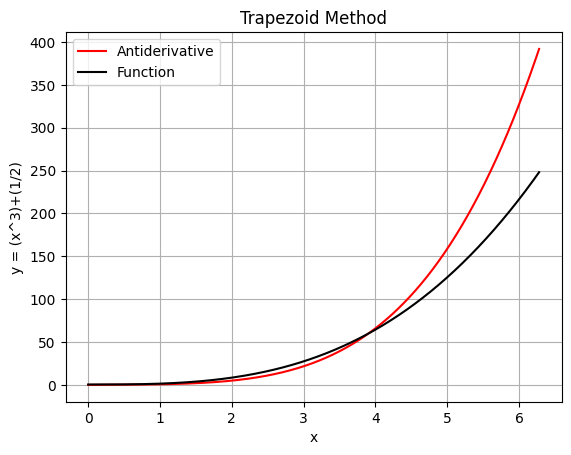

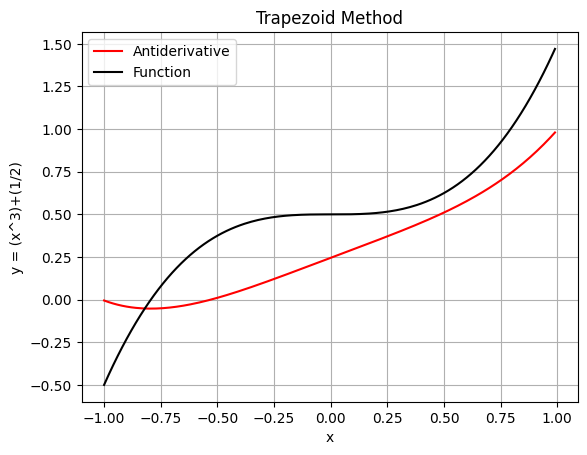

In [11]:
for i in range(len(lower_limit)):

  integral, x = cumulative_integral_trapezoid(h,lower_limit[i],upper_limit[i],dx)
  yvals = h(x)

  plt.plot(x, integral, c='Red', label = "Antiderivative")
  plt.plot(x, yvals,c='Black', label = "Function")
  plt.xlabel("x")
  plt.ylabel("y = (x^3)+(1/2)")
  #plt.ylim(-1, 20)
  #plt.axis('tight')
  #plt.autoscale(axis='y')
  plt.grid(True)
  plt.title("Trapezoid Method")
  plt.legend()
  plt.show()